*Import libraries (tensorflow backend)*

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing.image import img_to_array
from keras.models import load_model

*Build the CNN*

In [ ]:
classifier = Sequential()

****Convolution**

In [ ]:
classifier.add(Conv2D(32, (3, 3), activation="relu", input_shape=(64, 64, 3))) # 32 feature 3x3

Choose 32 feature detectors and an input shape of 3D image of 64x64 pixels

***Pooling***

In [ ]:
classifier.add(MaxPooling2D(pool_size = (2, 2)))

Pooling is made with a 2x2 array 

Add 2nd convolutional layer with the same structure as the 1st to improve predictions

In [ ]:
classifier.add(Conv2D(32, (3, 3), activation="relu"))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

***Flattening***

In [ ]:
classifier.add(Flatten())  #to convert to 1 dimensional

***Full Connection***

In [ ]:
classifier.add(Dense(activation = 'relu', units = 128))
classifier.add(Dense(activation = 'sigmoid', units = 1))

CNN has 128 nodes in the first layer of the ANN that's connected in the backbone with rectifier activation function.  We then add sigmoid activation function because we have binary outcome with 1 node in the output layer.

***Compile the CNN***

In [ ]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

adam is for stohastic gradient descent and binary crossentropy for logarithmic loss for binary outcomes

In [ ]:
print(classifier.summary())

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 128)               802944    
_________________________________________________________________
dense_12 (Dense)             (None, 1)                

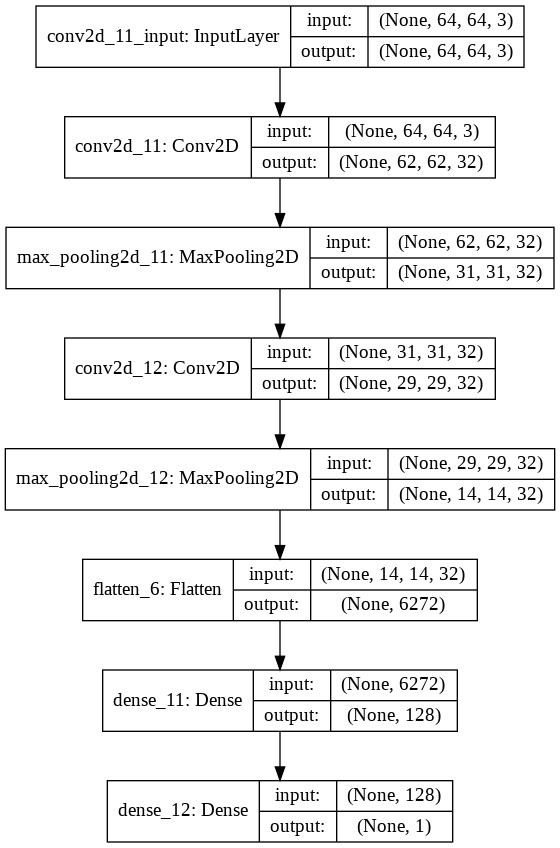

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(classifier, to_file ='classifier_plot.jpeg', show_shapes=True, show_layer_names=True)


***Image Augmentation***

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

Apply several transformations to train the model in a better significant way, keras documentation provides all the required information for augmentation

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
	classifier.save('final_model_new.h5')


In [ ]:
training_set = train_datagen.flow_from_directory('/content/drive/My Drive/chest_xray/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('/content/drive/My Drive/chest_xray/test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [ ]:
classifier.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 128)               802944    
_________________________________________________________________
dense_12 (Dense)             (None, 1)                

In [ ]:
history = classifier.fit_generator(training_set,
                         steps_per_epoch = 50,
                         epochs = 6,
                         validation_data = test_set,
                         validation_steps = 624)

Epoch 1/10
163/163 [==============================] - 343s 2s/step - loss: 0.3607 - accuracy: 0.8407 - val_loss: 0.2361 - val_accuracy: 0.8145
Epoch 2/10
163/163 [==============================] - 339s 2s/step - loss: 0.2334 - accuracy: 0.9047 - val_loss: 0.3997 - val_accuracy: 0.8604
Epoch 3/10
163/163 [==============================] - 330s 2s/step - loss: 0.1988 - accuracy: 0.9210 - val_loss: 0.3556 - val_accuracy: 0.8763
Epoch 4/10
163/163 [==============================] - 325s 2s/step - loss: 0.1975 - accuracy: 0.9201 - val_loss: 0.5835 - val_accuracy: 0.7534
Epoch 5/10
163/163 [==============================] - 330s 2s/step - loss: 0.1791 - accuracy: 0.9277 - val_loss: 0.5518 - val_accuracy: 0.8797
Epoch 6/10
163/163 [==============================] - 326s 2s/step - loss: 0.1757 - accuracy: 0.9262 - val_loss: 0.4917 - val_accuracy: 0.8255
Epoch 7/10
163/163 [==============================] - 327s 2s/step - loss: 0.1619 - accuracy: 0.9381 - val_loss: 0.7306 - val_accuracy: 0.8525

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


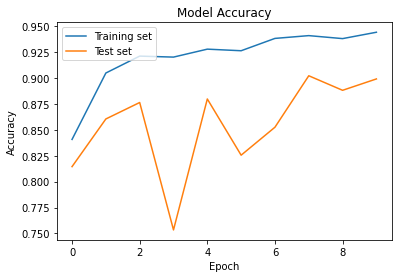

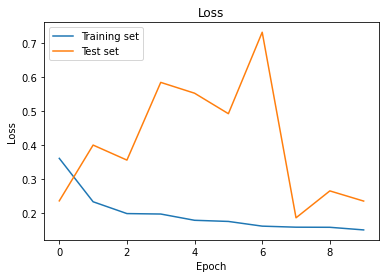

In [ ]:
#Accuracy
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Test set'], loc='upper left')
plt.show()

#Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Test set'], loc='upper left')
plt.show()







In [ ]:
print(test_set.class_indices)




{'NORMAL': 0, 'PNEUMONIA': 1}


In [ ]:
from keras.preprocessing.image import load_img

def load_image(filename):
	# load the image
	img = load_img(filename, target_size=(64, 64))
	# convert to array
	img = img_to_array(img)
	# reshape into a single sample with 3 channels
#	img = img.reshape(1, 224, 224, 3)
	# center pixel data
	img = img.astype('float32')
	img = img - [123.68, 116.779, 103.939]
	return img

Using TensorFlow backend.


In [ ]:
def run_example():
	# load the image
 img = load_image('/content/drive/My Drive/sample.jpeg')
 # load model
 model = load_model('/content/final_model_new.h5')
 # predict the class
 result = classifier.predict(img)
 print(result[0])

In [ ]:
run_example()

FileNotFoundError: ignored